In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv('PimaIndiansDiabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **1 Outcome is categorical because there are only two possibilities. The BMI and DiabetesPedigreeFunction are numerical because they have decimals and the rest (Glucose, BloodPressure, SkinThickness, Insulin, Age) are numerical because the order of the values is important. Pregnancies could be considered categorical if we assumed the fixed number of unique pregnancies in the data set are the only values possible.** 

In [25]:
# 1
# converting data to correct type
data['Outcome_cat'] = data['Outcome'].astype('category') 

<AxesSubplot:xlabel='Glucose', ylabel='Outcome_cat'>

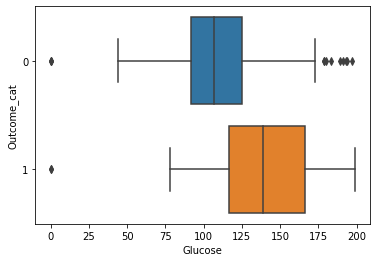

In [26]:
# 2
# Box plot for Glucose variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'Glucose', y = 'Outcome_cat')

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome_cat'>

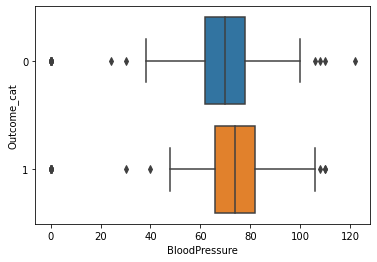

In [27]:
# 2
# Box plot for BloodPressure variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'BloodPressure', y = 'Outcome_cat')

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome_cat'>

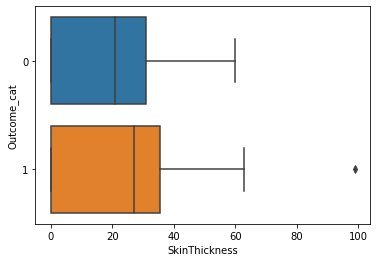

In [28]:
# 2
# Box plot for SkinThickness variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'SkinThickness', y = 'Outcome_cat')

<AxesSubplot:xlabel='Insulin', ylabel='Outcome_cat'>

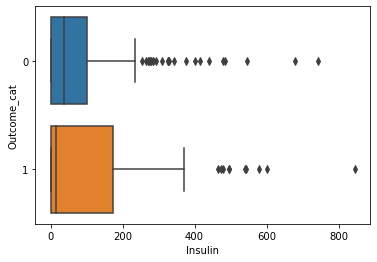

In [29]:
# 2
# Box plot for Insulin variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'Insulin', y = 'Outcome_cat')

<AxesSubplot:xlabel='BMI', ylabel='Outcome_cat'>

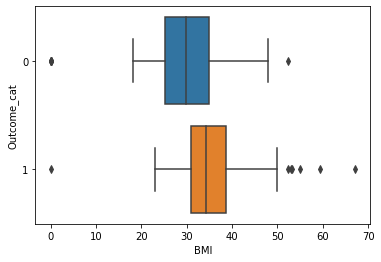

In [30]:
# 2
# Box plot for BMI variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'BMI', y = 'Outcome_cat')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome_cat'>

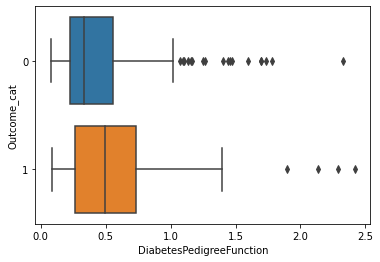

In [31]:
# 2
# Box plot for DiabetesPedigreeFunction variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'DiabetesPedigreeFunction', y = 'Outcome_cat')

<AxesSubplot:xlabel='Age', ylabel='Outcome_cat'>

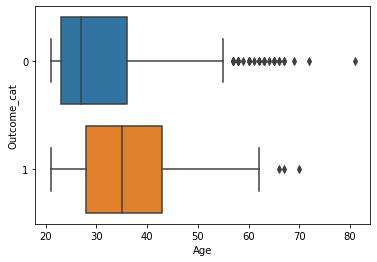

In [32]:
# 2
# Box plot for Age variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'Age', y = 'Outcome_cat')

Text(0, 0.5, 'Outcome Count')

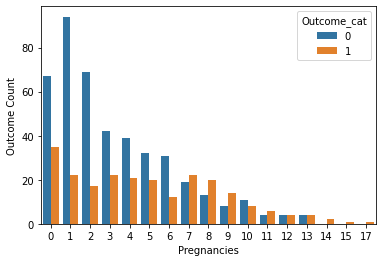

In [33]:
# 2 Bar plot for Pregnancy categorical against outcome
preg_groups_count = data.groupby(by = ['Outcome_cat','Pregnancies'], as_index=False).count()
preg_axis = sns.barplot(data=preg_groups_count, x = 'Pregnancies', y = 'Glucose',hue = 'Outcome_cat')
preg_axis.set_ylabel('Outcome Count')

In [34]:
# dropping cat_column
data = data.drop('Outcome_cat', axis = 1)

### **3. With the exception of pregnancies and outcome, all the other 0's must be representing NA's/missing value. There are two options to fix this: 1. replace 0 with median  2. drop rows with 0 in any value. For the rest of the analysis I will be considering all of the variables except for the outcome as numerical.**

In [35]:
# 3
# making two data sets, one where I will replace 0 with median, another where I drop rows with 0
data_median = data.copy()
data_drop = data.copy()
# Replacing missing values with median
for col in data_median.columns:
    if col in ['Pregnancies','Outcome']:
        continue
    else:
        data_median[col] = data_median[col].replace(0,data_median[col].median())
# Dropping rows with missing values
for col in data_drop.columns:
    if col in ['Pregnancies','Outcome']:
        continue
    else:
        data_drop[col] = data_drop[col].replace(0,np.NaN)
data_drop = data_drop.dropna()

### **4. I chose 10xfold Cross Validation for my testing purposes. I am going try RandomForest, SVM and KNN on both the data sets (one with median replacement, one with dropped na's). To regularize against overfitting I will be using GridSearchCV also with 10xfold Cross Validation to search for the best hyperparameters for each model. To determine which model is best, I will be comparing the cross validated AUC scores of each model.**

In [44]:
# 4
# I will use 10xfold Cross Validation for testing
# First, I will do randomForest with the data where missing rows were replaced with the median 
param_rf = {'max_features':['sqrt','log2', 2, 3, 4, 5, 6, 7, None],
        'max_depth':[2, 3, 4, 5, 6, 7],
        'n_estimators':np.arange(10,100,10)}

rf_model = RandomForestClassifier(random_state= 777)
grid_rf_median = GridSearchCV(rf_model, param_rf, cv = 10, scoring= 'roc_auc', n_jobs= -1)
grid_rf_median = grid_rf_median.fit(data_median.drop('Outcome', axis = 1), data_median['Outcome'])
print(f' the best auc score returned from GridSearchCV where missing values were replaced with the median is {grid_rf_median.best_score_}')
print(f' the best estimator returned from GridSearchCV where missing values were replaced with the median is {grid_rf_median.best_estimator_}')

auc_score = np.mean(cross_val_score(grid_rf_median.best_estimator_, data_median.drop('Outcome', axis = 1), data_median['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from cross_val_score where missing values were replaced with the median is {auc_score}')

 the best auc score returned from GridSearchCV where missing values were replaced with the median is 0.8377838036584244
 the best estimator returned from GridSearchCV where missing values were replaced with the median is RandomForestClassifier(max_depth=5, max_features=4, n_estimators=80,
                       random_state=777)
 the final auc score returned from cross_val_score where missing values were replaced with the median is 0.8377838036584244


In [45]:
# 4
# I will use 10xfold Cross Validation for testing
# First, I will do randomForest with the data where rows with missing values were dropped
grid_rf_drop = GridSearchCV(rf_model, param_rf, cv = 10, scoring= 'roc_auc', n_jobs= -1)
grid_rf_drop = grid_rf_drop.fit(data_drop.drop('Outcome', axis = 1), data_drop['Outcome'])
print(f' the best auc score returned from GridSearchCV where rows with missing values were dropped is {grid_rf_drop.best_score_}')
print(f' the best estimator returned from GridSearchCV where rows with missing values were dropped is {grid_rf_drop.best_estimator_}')

auc_score = np.mean(cross_val_score(grid_rf_drop.best_estimator_, data_drop.drop('Outcome', axis = 1), data_drop['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from cross_val_score where rows with missing values were dropped is {auc_score}')

 the best auc score returned from GridSearchCV where rows with missing values were dropped is 0.8686100131752307
 the best estimator returned from GridSearchCV where rows with missing values were dropped is RandomForestClassifier(max_depth=5, max_features=4, n_estimators=50,
                       random_state=777)
 the final auc score returned from cross_val_score where rows with missing values were dropped is 0.8686100131752307


In [60]:
# 4
# Performing SVM Classification with the data where missing rows were replaced with the median 
param_svc = {'C':np.arange(0.1,2.0,0.1)}

svc_model = SVC(random_state= 777, probability= True)
grid_svc_median = GridSearchCV(svc_model, param_svc, cv = 10)
grid_svc_median = grid_svc.fit(data_median.drop('Outcome', axis = 1), data_median['Outcome'])
print(f' the best auc score returned from GridSearchCV where missing values were replaced with the median is {grid_svc_median.best_score_}')
print(f' the best estimator returned from GridSearchCV where missing values were replaced with the median is {grid_svc_median.best_estimator_}')

auc_score = np.mean(cross_val_score(grid_svc_median.best_estimator_, data_median.drop('Outcome', axis = 1), data_median['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from cross_val_score where missing values were replaced with the median is {auc_score}')


 the best auc score returned from GridSearchCV where missing values were replaced with the median is 0.7485753052917231
 the best estimator returned from GridSearchCV where missing values were replaced with the median is SVC(C=0.8, random_state=777)
 the final auc score returned from cross_val_score where missing values were replaced with the median is 0.8063348346968165


In [61]:
# 4
# Performing SVM Classification with the data where rows with missing values were dropped
grid_svc_drop = GridSearchCV(svc_model, param_svc, cv = 10)
grid_svc_drop = grid_svc_drop.fit(data_drop.drop('Outcome', axis = 1), data_drop['Outcome'])
print(f' the best auc score returned from GridSearchCV where rows with missing values were dropped is {grid_svc_drop.best_score_}')
print(f' the best estimator returned from GridSearchCV where rows with missing values were dropped is {grid_svc_drop.best_estimator_}')

auc_score = np.mean(cross_val_score(grid_svc_drop.best_estimator_, data_drop.drop('Outcome', axis = 1), data_drop['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from cross_val_score where rows with missing values were dropped is {auc_score}')


 the best auc score returned from GridSearchCV where rows with missing values were dropped is 0.7530252100840336
 the best estimator returned from GridSearchCV where rows with missing values were dropped is SVC(C=0.7000000000000001, probability=True, random_state=777)
 the final auc score returned from cross_val_score where rows with missing values were dropped is 0.8163208168642951


In [49]:
# 4
# Performing KNN Classification with the data where missing rows were replaced with the median 
param_knn = {'n_neighbors':np.arange(3,15,1)}

knn_model = KNeighborsClassifier()
grid_knn_median = GridSearchCV(knn_model, param_knn, cv = 10)
grid_knn_median = grid_knn_median.fit(data_median.drop('Outcome', axis = 1), data_median['Outcome'])
print(f' the best auc score returned from GridSearchCV where missing values were replaced with the median is {grid_knn_median.best_score_}')
print(f' the best estimator returned from GridSearchCV where missing values were replaced with the median is {grid_knn_median.best_estimator_}')

auc_score = np.mean(cross_val_score(grid_knn_median.best_estimator_, data_median.drop('Outcome', axis = 1), data_median['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from cross_val_score where missing values were replaced with the median is {auc_score}')

 the best auc score returned from GridSearchCV where missing values were replaced with the median is 0.7306196291270918
 the best estimator returned from GridSearchCV where missing values were replaced with the median is KNeighborsClassifier(n_neighbors=12)
 the final auc score returned from cross_val_score where missing values were replaced with the median is 0.7856797882771087


In [50]:
# 4
# Performing KNN Classification with the data where rows with missing values were dropped 
param_knn = {'n_neighbors':np.arange(3,15,1)}

knn_model = KNeighborsClassifier()
grid_knn_drop = GridSearchCV(knn_model, param_knn, cv = 10)
grid_knn_drop = grid_knn_drop.fit(data_drop.drop('Outcome', axis = 1), data_drop['Outcome'])
print(f' the best auc score returned from GridSearchCV where rows with missing values were dropped is {grid_knn_drop.best_score_}')
print(f' the best estimator returned from GridSearchCV where rows with missing values were dropped is {grid_knn_drop.best_estimator_}')

auc_score = np.mean(cross_val_score(grid_knn_drop.best_estimator_, data_drop.drop('Outcome', axis = 1), data_drop['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from cross_val_score where rows with missing values were dropped is {auc_score}')

 the best auc score returned from GridSearchCV where rows with missing values were dropped is 0.7473109243697478
 the best estimator returned from GridSearchCV where rows with missing values were dropped is KNeighborsClassifier(n_neighbors=14)
 the final auc score returned from cross_val_score where rows with missing values were dropped is 0.7944499341238471


#### **In an attempt to see if combining the classifiers improved performance, I used VotingClassifier to combine the highest performing classifiers from the above models and got an auc of 0.833, which was lower than my best individual model.**

In [62]:
# Trying to combine methods using voting classifier 
eclf = VotingClassifier(estimators=[('rf', grid_rf_drop.best_estimator_), ('svc', grid_svc_drop.best_estimator_), ('knn', grid_knn_drop.best_estimator_)], voting='soft')
auc_score = np.mean(cross_val_score(eclf, data_drop.drop('Outcome', axis = 1), data_drop['Outcome'], cv = 10, scoring= 'roc_auc', n_jobs= -1))
print(f' the final auc score returned from the voting classifier where rows with missing values were dropped is {auc_score}')

 the final auc score returned from the voting classifier where rows with missing values were dropped is 0.8331851119894598


### **5. From the above it can be seen that the RandomForestClassifier with max_depth=5, max_features=4, and n_estimators=50 when used on the data set in which rows with NA were dropped performed the best, with an AUC score of 0.8686. The code for my best performing model can be seen in the cell below:**

In [63]:
# 5
grid_rf_drop = GridSearchCV(rf_model, param_rf, cv = 10, scoring= 'roc_auc', n_jobs= -1)
grid_rf_drop = grid_rf_drop.fit(data_drop.drop('Outcome', axis = 1), data_drop['Outcome'])
best_model = grid_rf_drop.best_estimator_ # please use this to test